# **1. Make Necessary Imports**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.utils.multiclass import unique_labels

# **2. Understand Data**

In [ ]:
df=pd.read_csv("tripadvisor_hotel_reviews.csv", on_bad_lines='skip')

In [ ]:
#print five rows of the training data
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
#print datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35325 entries, 0 to 35324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  35325 non-null  object
 1   Rating  35325 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 552.1+ KB


In [ ]:
#Statistics of Ratings
df.describe()

,Rating
count,35325.000000
mean,3.964331
std,1.226513
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
#Display percentage of distribution of various ratings 
rating_1_percent = df['Rating'].value_counts()[1]/df['Rating'].count()
rating_2_percent = df['Rating'].value_counts()[2]/df['Rating'].count()
rating_3_percent = df['Rating'].value_counts()[3]/df['Rating'].count()
rating_4_percent = df['Rating'].value_counts()[4]/df['Rating'].count()
rating_5_percent = df['Rating'].value_counts()[5]/df['Rating'].count()
print(f'Rating 1 percentahe is {rating_1_percent*100}%')
print(f'Rating 2 percentahe is {rating_2_percent*100}%')
print(f'Rating 3 percentahe is {rating_3_percent*100}%')
print(f'Rating 4 percentahe is {rating_4_percent*100}%')
print(f'Rating 5 percentahe is {rating_5_percent*100}%')

Rating 1 percentahe is 6.771408351026185%
Rating 2 percentahe is 8.617126680820949%
Rating 3 percentahe is 10.581740976645435%
Rating 4 percentahe is 29.466383581033263%
Rating 5 percentahe is 44.56334041047417%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


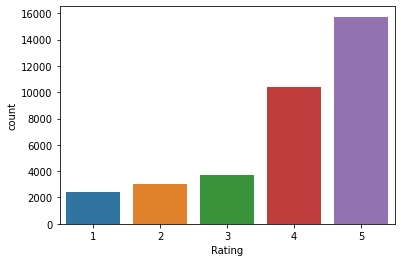

In [ ]:
#Count plot of ratings
sns.countplot(df['Rating'])

# **3. Preprocess Data**

### we will be cleaning the text by removing unncessary characters, numbers and white spaces.

In [ ]:
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[""''_]', '', text)
    text = re.sub('\n', '', text)
    return text

In [ ]:
def decontract_text(text):
    """
    Decontract text
    """
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    
    return text

In [ ]:
df['cleaned_review'] = (df['Review'].apply(lambda x: decontract_text(x))).apply(lambda x: text_clean(x))


In [ ]:
print('Original Description:\n', df['Review'][0])
print('\n\nCleaned Description:\n', df['cleaned_review'][0])

Original Description:
 nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  


Cleaned Description:
 nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talk

Now we will perform an 80-20 split on the training data in order to obtain our training and testing dataset required for fitting the model.

In [ ]:
x, y = df['cleaned_review'], df['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f'x_train: {len(x_train)}')
print(f'x_test: {len(x_test)}')
print(f'y_train: {len(y_train)}')
print(f'y_test: {len(y_test)}')

x_train: 28260
x_test: 7065
y_train: 28260
y_test: 7065


# **4. Model**

We will be using a tfid vectorizer for extracting the features by converting the cleaned text to a matrix of TF-IDF features. For the classification, we use logistic regression. Finally, we create a model pipeline by combining the vectorizer and the classifier.

1. Using Logistic regression

In [ ]:
tvec = TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
model = Pipeline([('vectorizer', tvec), ('classifier', clf)])
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = model.predict(x_test)

print(f'Accurcy: {accuracy_score(y_pred, y_test)}')
print(f'Precision: {precision_score(y_pred, y_test, average="weighted")}')
print(f'Recall: {recall_score(y_pred, y_test, average="weighted")}')

Accurcy: 0.729794762915782
Precision: 0.7512128108586837
Recall: 0.729794762915782


2. XGBoost

In [ ]:
tvec = TfidfVectorizer()
clf = XGBClassifier(objective='binary:logistic')
model = Pipeline([('vectorizer', tvec), ('classifier', clf)])
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', XGBClassifier(objective='multi:softprob'))])

In [ ]:
y_pred = model.predict(x_test)

print(f'Accurcy: {accuracy_score(y_pred, y_test)}')
print(f'Precision: {precision_score(y_pred, y_test, average="weighted")}')
print(f'Recall: {recall_score(y_pred, y_test, average="weighted")}')

Accurcy: 0.5923566878980892
Precision: 0.69356472101838
Recall: 0.5923566878980892


3 Bernoulli Naive Bayes

In [ ]:
tvec = TfidfVectorizer()
clf = BernoulliNB()
model = Pipeline([('vectorizer', tvec), ('classifier', clf)])
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', BernoulliNB())])

In [ ]:
y_pred = model.predict(x_test)

print(f'Accurcy: {accuracy_score(y_pred, y_test)}')
print(f'Precision: {precision_score(y_pred, y_test, average="weighted")}')
print(f'Recall: {recall_score(y_pred, y_test, average="weighted")}')

Accurcy: 0.5814578910120312
Precision: 0.6912222789402698
Recall: 0.5814578910120312


# **5. Evaluation**

We evaluate the model against the testing dataset. We compute the accuracy, precision and recall. Also, we plot a confusion matrix to get a better understanding about the model's performance.

In [ ]:
y_pred = model.predict(x_test)

print(f'Accurcy: {accuracy_score(y_pred, y_test)}')
print(f'Precision: {precision_score(y_pred, y_test, average="weighted")}')
print(f'Recall: {recall_score(y_pred, y_test, average="weighted")}')

Accurcy: 0.729794762915782
Precision: 0.7512128108586837
Recall: 0.729794762915782
